# **Credit Default Prediction**
## **By: Arsh Vohra**

<img src ='https://www.tomorrowmakers.com/sites/default/files/2021-11/Did%20you%20know%20that%20borrowers%20have%20certain%20rights%20even%20after%20a%20loan%20default.jpg'>


## Description:
**In this data science project, we address the problem of credit default prediction using two powerful machine learning algorithms - Decision Trees and Random Forests. The goal is to build models that can accurately identify customers who are likely to default on their credit obligations. The dataset contains various features related to customers' credit profiles, such as credit history, savings balance, and employment duration, which will be used to train the models.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import wa
sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 600

In [2]:
df = pd.read_csv("credit.csv")
df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
df.shape

(1000, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [6]:
col = df.loc[:,df.dtypes =='object'].columns.tolist()
df.loc[:,df.dtypes == 'object'].head()

,checking_balance,credit_history,purpose,savings_balance,employment_duration,other_credit,housing,job,phone,default
0,< 0 DM,critical,furniture/appliances,unknown,> 7 years,none,own,skilled,yes,no
1,1 - 200 DM,good,furniture/appliances,< 100 DM,1 - 4 years,none,own,skilled,no,yes
2,unknown,critical,education,< 100 DM,4 - 7 years,none,own,unskilled,no,no
3,< 0 DM,good,furniture/appliances,< 100 DM,4 - 7 years,none,other,skilled,no,no
4,< 0 DM,poor,car,< 100 DM,1 - 4 years,none,other,skilled,no,yes


In [7]:
target_col = 'default'
input_cols = [x for x in df.columns if x not in target_col]
df[target_col] = df[target_col].astype('category')

In [8]:
cate_cols = df[input_cols].select_dtypes(include='object').columns.tolist()
numerical_cols = [x for x in input_cols if x not in cate_cols]

In [9]:
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False).fit(df[cate_cols])
encoded_col = encoder.get_feature_names_out().tolist()
df[encoded_col]= encoder.transform(df[cate_cols])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [10]:
x = df[numerical_cols + encoded_col]
y = df[target_col]

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [12]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
print(dt_model.score(x_train, y_train))
print(dt_model.score(x_test,y_test))

1.0
0.6433333333333333


In [14]:
%%time
'''ma = [3,5,10,25]
ml = [15,30,70]
md = [15,30, 70]'''
model_preformance_data =[]

for i in np.arange(1,51,1):
    for j in np.arange(10,101,10):
        for k in np.arange(10,101,10):
            for l in np.arange(0,2,0.1):
                
                mp = DecisionTreeClassifier(criterion = 'gini',max_depth = i,min_samples_leaf=j,min_samples_split=k,random_state=42,ccp_alpha=l)
                dt_model = mp.fit(x_train,y_train)
                test_pred = dt_model.predict_proba(x_test)
                train_pred = dt_model.predict_proba(x_train)
                t1 = "max_depth"+str(i)+"_min_leaf"+str(j)+"_min_split_"+str(k)+"_ccp_aplha"+str(l)
                t2 = [t1,round(roc_auc_score(y_train, train_pred[:,1]),4),round(roc_auc_score(y_test, test_pred[:,1]),4)]
                model_preformance_data.append(t2)

CPU times: total: 13min 3s
Wall time: 23min 20s


In [15]:
df2 = pd.DataFrame(model_preformance_data)
df2.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)

In [16]:
df2.sort_values(['Test AUC','Train AUC'],ascending= False)

,Model,Train AUC,Test AUC
3600,max_depth2_min_leaf90_min_split_10_ccp_aplha0.0,0.7174,0.7372
3620,max_depth2_min_leaf90_min_split_20_ccp_aplha0.0,0.7174,0.7372
3640,max_depth2_min_leaf90_min_split_30_ccp_aplha0.0,0.7174,0.7372
3660,max_depth2_min_leaf90_min_split_40_ccp_aplha0.0,0.7174,0.7372
3680,max_depth2_min_leaf90_min_split_50_ccp_aplha0.0,0.7174,0.7372
...,...,...,...
99995,max_depth50_min_leaf100_min_split_100_ccp_aplh...,0.5000,0.5000
99996,max_depth50_min_leaf100_min_split_100_ccp_aplh...,0.5000,0.5000
99997,max_depth50_min_leaf100_min_split_100_ccp_aplh...,0.5000,0.5000
99998,max_depth50_min_leaf100_min_split_100_ccp_aplh...,0.5000,0.5000


In [17]:
dt_model = DecisionTreeClassifier(max_depth=9,min_samples_leaf=10,min_samples_split=30,ccp_alpha=0.0,random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=30,
                       random_state=42)

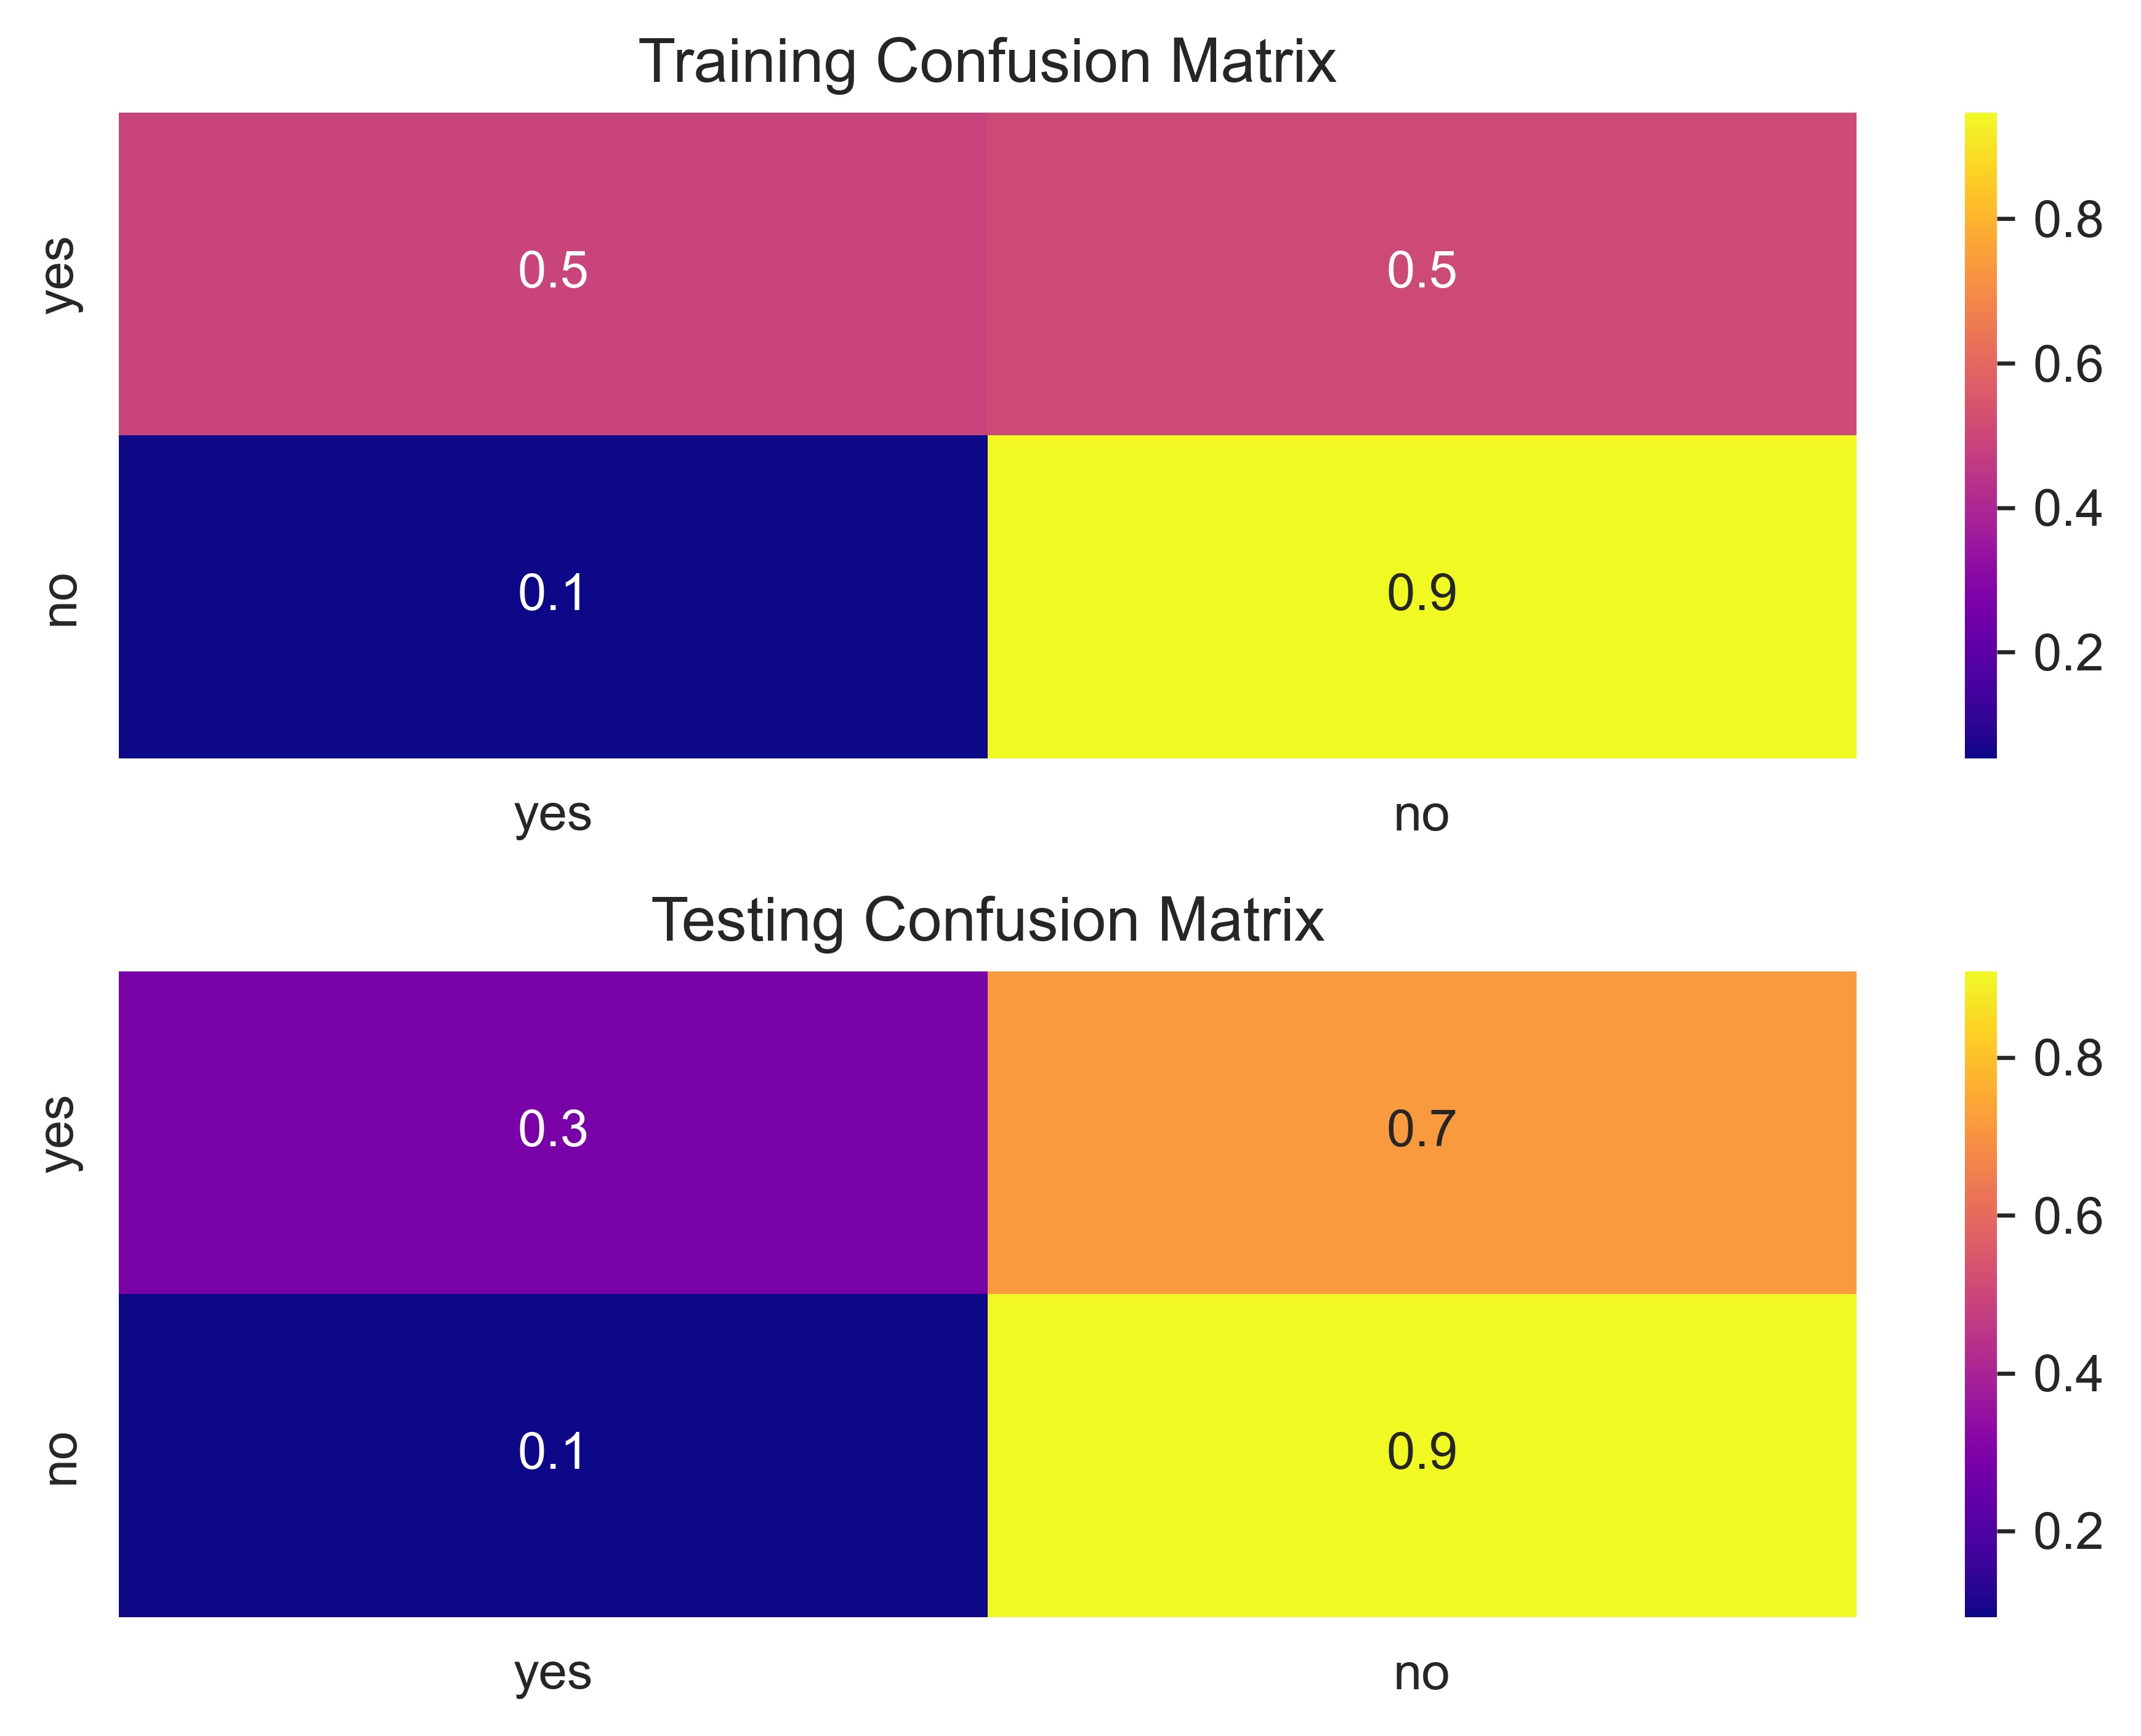

In [18]:
train_cm = confusion_matrix(y_train,dt_model.predict(x_train),labels=['yes','no'],normalize='true')
test_cm = confusion_matrix(y_test,dt_model.predict(x_test),labels=['yes','no'],normalize='true')
label = ['yes','no']
plt.subplot(2,1,1)
sns.heatmap(train_cm,cmap='plasma',annot=True,fmt='0.1f',xticklabels=label,yticklabels=label)
plt.title("Training Confusion Matrix")
plt.subplot(2,1,2)
sns.heatmap(test_cm,cmap='plasma',annot=True,fmt='0.1f',xticklabels=label,yticklabels=label)
plt.title("Testing Confusion Matrix")

plt.tight_layout()

In [20]:
%%time
n_estimators = [100, 200, 300]
max_depth = [5, 10, 20,]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['sqrt', 'log2']
ccp_alpha = [0.1,0.2,0.3,0.01]

# Create a list to store the results
results = []

# Loop over all hyperparameter combinations
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                for f in max_features:
                    for i in ccp_alpha:
                        
                        rf = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l, max_features=f,ccp_alpha=i,random_state=42,n_jobs=-1)
                        rf.fit(x_train, y_train)
                        test_pred = rf.predict_proba(x_test)
                        train_pred = rf.predict_proba(x_train)
                        t1 = "n_estimators_"+str(n)+"_max_depth_"+str(d)+"_min_samples_split_"+str(s)+"_min_samples_leaf_"+str(l)+"_max_features_"+str(f)+"_ccp_alpha"+str(i)
                        t2 = [t1,round(roc_auc_score(y_train, train_pred[:,1]),4),round(roc_auc_score(y_test, test_pred[:,1]),4)]
                        results.append(t2)
df3 = pd.DataFrame(results)
df3.rename({0:"Model",1:"Train AUC",2:"Test AUC"},axis= 1,inplace = True)
df3.sort_values(['Test AUC','Train AUC'],ascending= False).head(10)

CPU times: total: 3min 41s
Wall time: 9min 58s


,Model,Train AUC,Test AUC
291,n_estimators_200_max_depth_10_min_samples_spli...,0.8069,0.7855
507,n_estimators_300_max_depth_10_min_samples_spli...,0.8092,0.7852
411,n_estimators_200_max_depth_20_min_samples_spli...,0.8030,0.7852
419,n_estimators_200_max_depth_20_min_samples_spli...,0.8042,0.7851
627,n_estimators_300_max_depth_20_min_samples_spli...,0.8050,0.7850
379,n_estimators_200_max_depth_20_min_samples_spli...,0.8014,0.7844
403,n_estimators_200_max_depth_20_min_samples_spli...,0.8014,0.7844
563,n_estimators_300_max_depth_10_min_samples_spli...,0.8067,0.7843
579,n_estimators_300_max_depth_20_min_samples_spli...,0.8046,0.7843
347,n_estimators_200_max_depth_10_min_samples_spli...,0.8043,0.7843


In [21]:
rf_model = RandomForestClassifier(n_estimators =200, max_depth=20,min_samples_leaf=2,min_samples_split=2,ccp_alpha=0.01,random_state=42)
rf_model.fit(x_train,y_train)

RandomForestClassifier(ccp_alpha=0.01, max_depth=20, min_samples_leaf=2,
                       n_estimators=200, random_state=42)

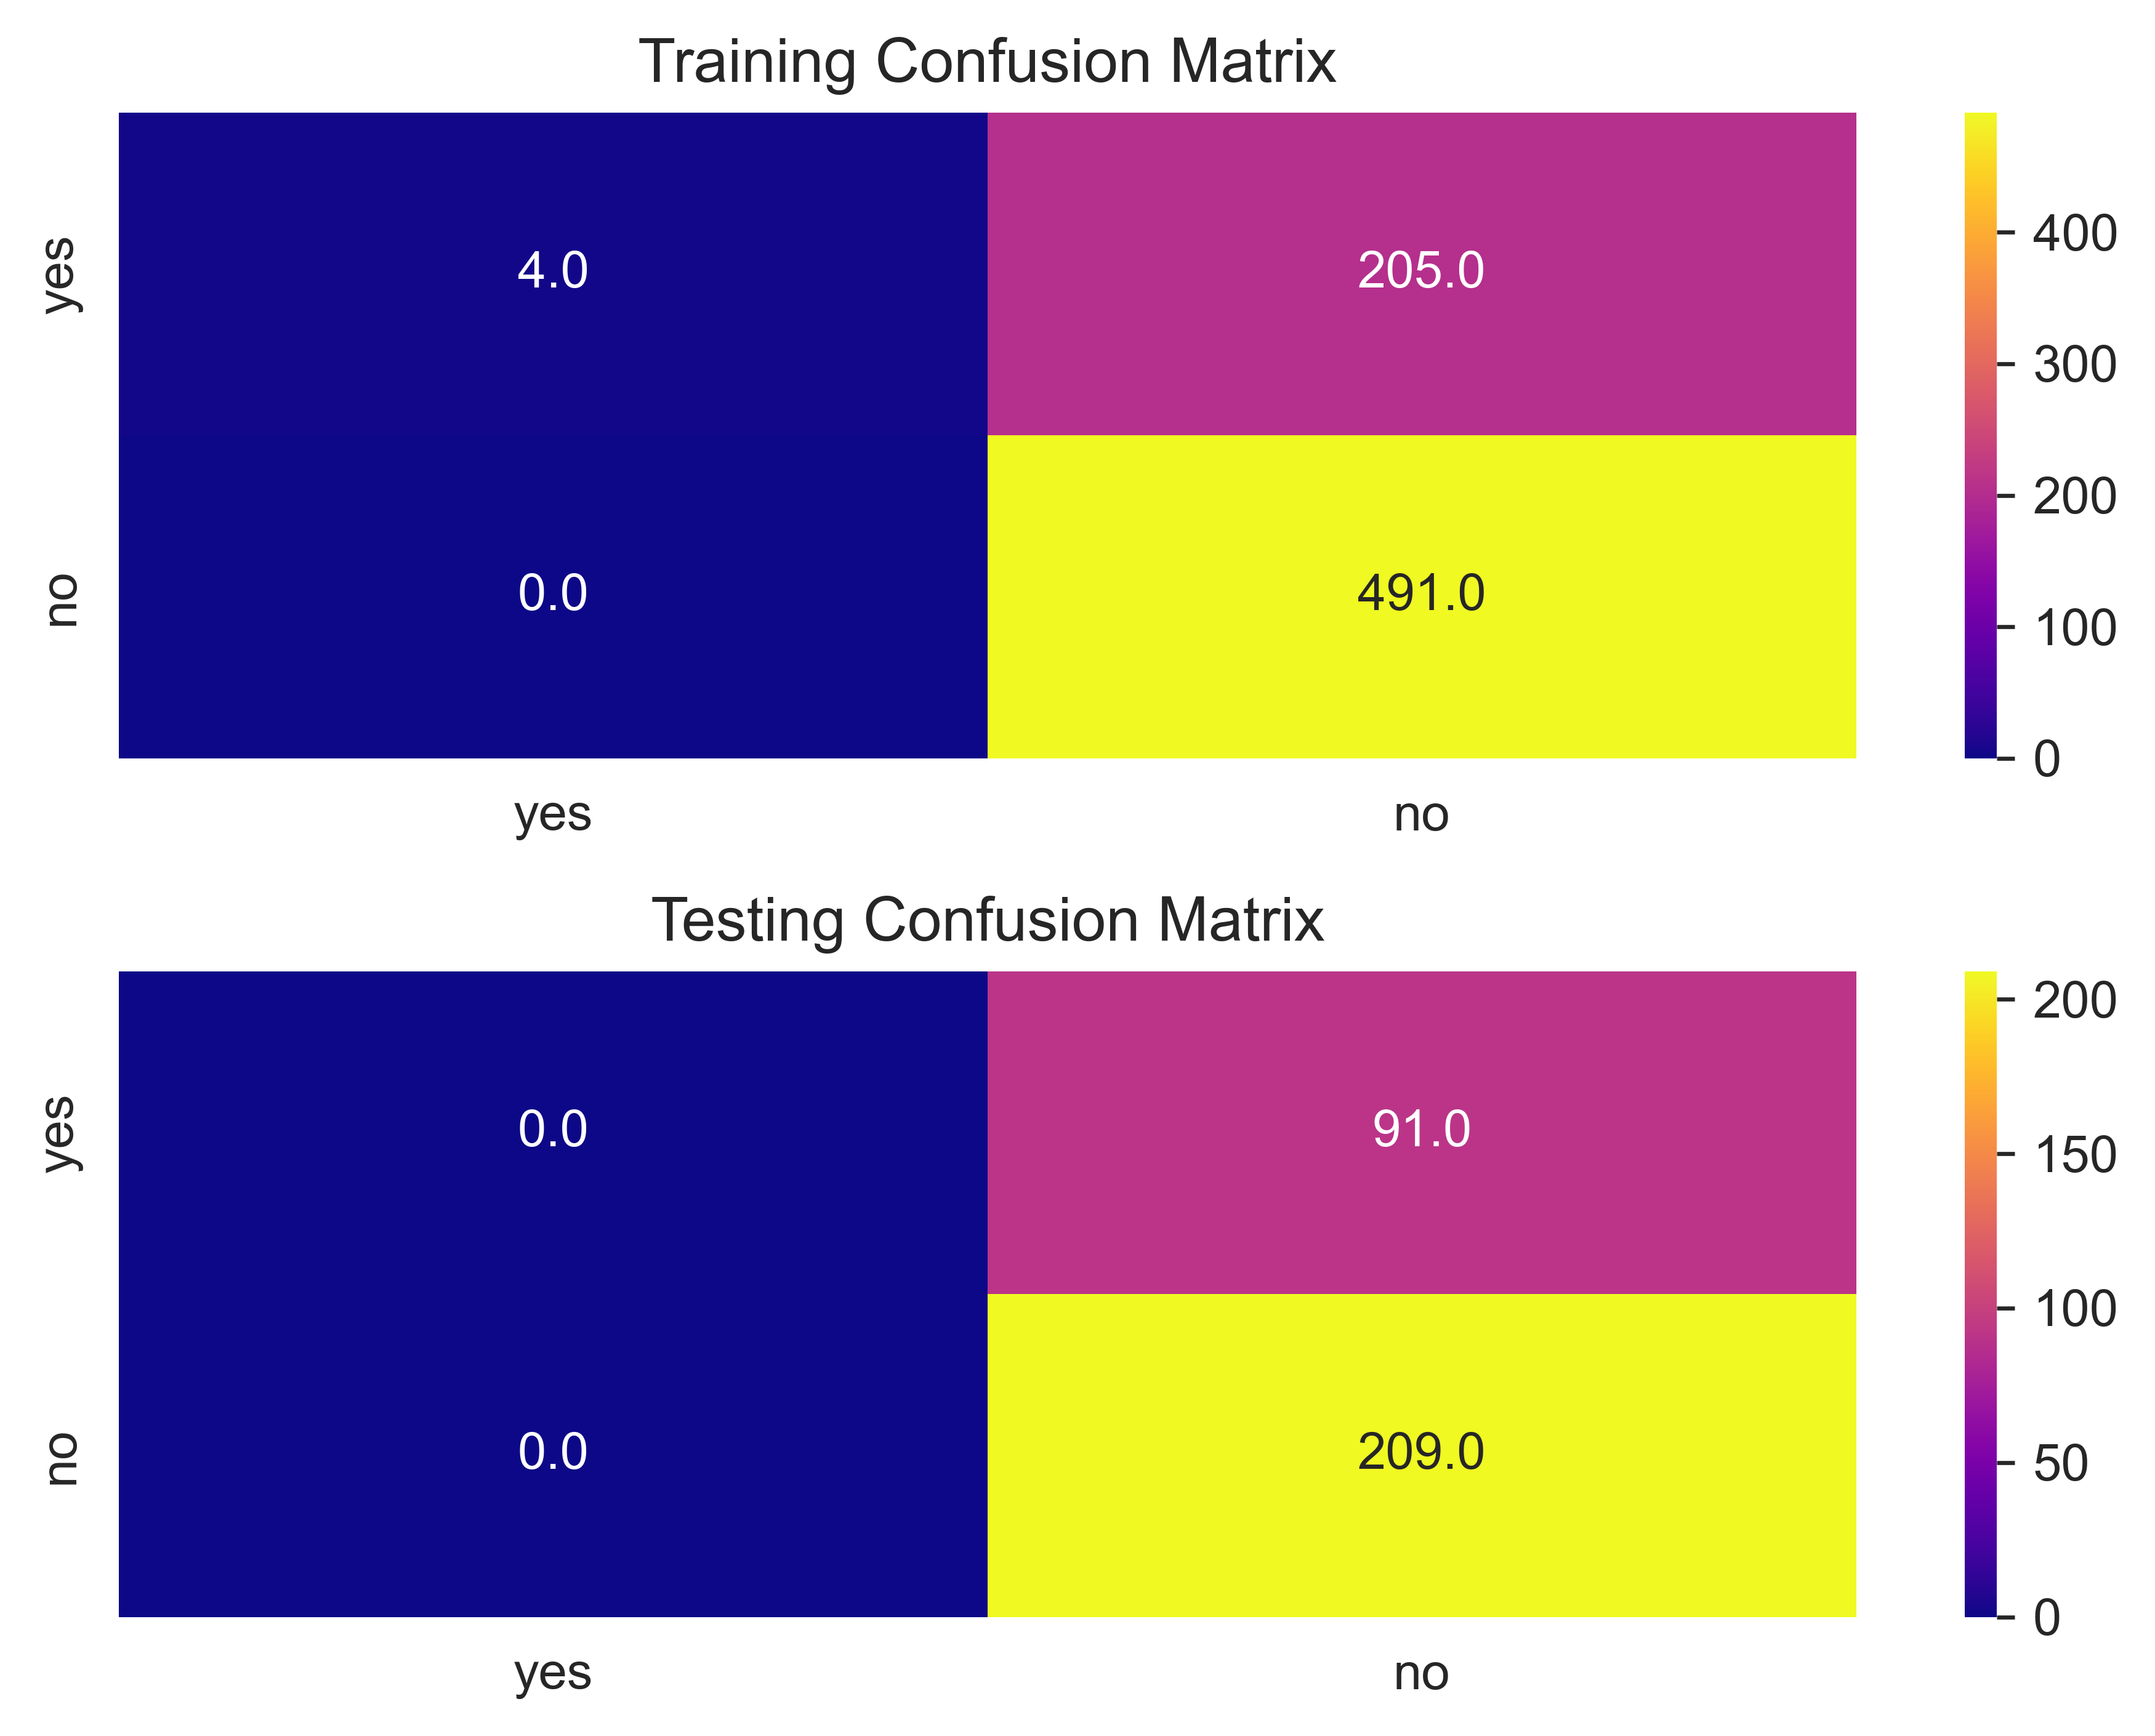

In [22]:
train_cm = confusion_matrix(y_train,rf_model.predict(x_train),labels=['yes','no'])
test_cm = confusion_matrix(y_test,rf_model.predict(x_test),labels=['yes','no'])
label = ['yes','no']
plt.subplot(2,1,1)
sns.heatmap(train_cm,cmap='plasma',annot=True,fmt='0.1f',xticklabels=label,yticklabels=label)
plt.title("Training Confusion Matrix")
plt.subplot(2,1,2)
sns.heatmap(test_cm,cmap='plasma',annot=True,fmt='0.1f',xticklabels=label,yticklabels=label)
plt.title("Testing Confusion Matrix")

plt.tight_layout()

In [24]:
rf_fpr_train,rf_trp_train,threshold = roc_curve(y_train,rf_model.predict_proba(x_train)[:,1],pos_label='yes')
rf_fpr_test,rf_trp_test,threshold = roc_curve(y_test,rf_model.predict_proba(x_test)[:,1],pos_label='yes')

fpr_train,tpr_train,thres = roc_curve(y_train,dt_model.predict_proba(x_train)[:,1],pos_label='yes')
fpr_test,tpr_test,thres = roc_curve(y_test,dt_model.predict_proba(x_test)[:,1],pos_label='yes')

plt.rcParams['font.size']=30

fig,axes = plt.subplots(1,2,figsize=(30,10))

axes[0].plot(fpr_train,tpr_train,label='Train')
axes[0].plot(fpr_test,tpr_test,label='Test')
axes[0].set_xlabel("FPR")
axes[0].set_ylabel("TRP")
axes[0].plot([0, 1])
axes[0].legend()
axes[0].set_title("Decision Tree")

axes[1].plot(rf_fpr_train,rf_trp_train,label='Train')
axes[1].plot(rf_fpr_test,rf_trp_test,label='Test')
axes[1].set_xlabel("FPR")
axes[1].set_ylabel("TRP")
axes[1].plot([0, 1])
axes[1].legend()
axes[1].set_title("Random Forest")

fig.suptitle("Roc Auc Curve")
plt.tight_layout()